#🧠 When Accuracy Lies...

## Cracking the Class Imbalance Challenge
A Hands-on Tutorial at Data Science Africa 2025

#👩🏾‍💻 Facilitator:
Dr. Sakinat Oluwabukonla Folorunso
Senior Faculty
Research Area: AI Systems and FAIR Data Science
Olabisi Onabanjo University, Ago-Iwoye, Ogun State, Nigeria
Google Scholar | GitHub | Website

🔍 About the Facilitator
I am an educator, researcher, and advocate for inclusive AI. My work centers on machine learning, federated systems, and FAIR data science—especially applied to challenges in healthcare, cultural preservation, and digital equity. I’m deeply passionate about building explainable and ethical AI tools that empower underrepresented communities and enhance Africa’s innovation landscape.

#📌 The Real Problem
In many real-world applications—like disease diagnosis, fraud detection, and rare event prediction—datasets suffer from class imbalance: one class significantly outnumbers the others.

For instance, a model may boast 95% accuracy simply by always predicting the majority class. But this can be dangerously misleading if the model fails to detect the minority class — which, in healthcare, could be the actual disease case.

#🎯 What This Tutorial Covers
In this hands-on session, you’ll learn how to:

✅ Detect and visualize class imbalance using simple metrics and plots
✅ Apply resampling techniques like SMOTE, ADASYN, Tomek Links, and ENN
✅ Evaluate performance with the right metrics:

    F1-Score
    Geometric Mean (G-Mean)
    Balanced Accuracy
    Index Balanced Accuracy (IBA)
✅ Use Principal Component Analysis (PCA) to visualize how resampling affects decision boundaries
✅ Explore model explainability with SHAP to interpret how models behave on imbalanced data
✅ Experiment live using interactive widgets in Jupyter notebooks
🌍 Why This Matters
Accuracy can lie. It often hides unfair treatment of underrepresented classes.
Real-world AI systems must be fair, inclusive, and trustworthy.
Resampling is not just a technical fix — it’s a step toward ethical AI.
As African researchers, engineers, and innovators, we must ensure our models work for all people and all cases, especially those most often ignored by the data.

#🚀 How We’ll Proceed
We’ll begin with a dataset. We’ll check:

 Is it imbalanced?
 Is there class overlap?
 Can our current model be trusted?

Then, step-by-step, we’ll clean, resample, retrain, and re-evaluate — all while reflecting on what these choices mean for real-world deployment.

#🧪 By the End of This Tutorial, You Will Be Able To:
Identify when accuracy is misleading
Apply and compare different resampling techniques
Visualize decision boundaries before and after resampling
Choose fair evaluation metrics
Make informed, ethical choices about model performance

🎉 Let’s build machine learning models that are not just accurate—but fair, inclusive, and truly intelligent.

Read more https://imbalanced-learn.org/stable/user_guide.html

Let the journey begin!

#🌍 African Contextual Example: Malaria Detection
In rural health centers across sub-Saharan Africa, malaria testing data often show significant class imbalance:

- Positive malaria cases (minority class) are **underreported** or **misdiagnosed**
- Majority of entries are "No Malaria" due to routine testing or asymptomatic patients
This makes malaria detection a real-world imbalanced classification problem.

👉 Ask participants: "If the model misses 80% of true malaria cases, how would that affect public health interventions?"

# Interactive Multi-class Resampling Exploration

This notebook lets you experiment with various resampling techniques on a synthetic imbalanced, overlapping multi-class dataset.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [2]:
from google.colab import drive       # Import the Google Drive integration module from Colab
drive.mount('/content/drive')        # Mount your Google Drive at the specified path to access its files

Mounted at /content/drive


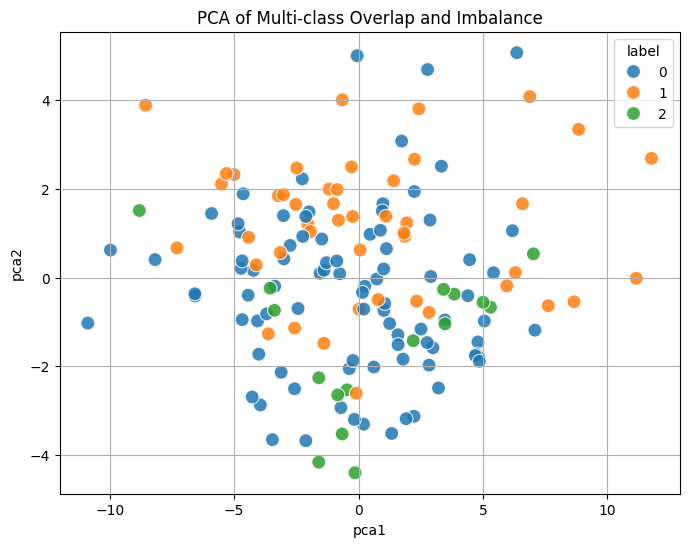

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Load dataset
df = pd.read_csv('/content/drive/My Drive/DSA TUTORIAL/Class Imbalance/mock_multiclass_overlap_imbalance.csv')  # mock dataset with class imbalance and overlap
#df = pd.read_csv("mock_multiclass_overlap_imbalance.csv")
X = df.drop("label", axis=1)
y = df["label"]

# PCA for 2D projection
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df["pca1"] = X_pca[:, 0]
df["pca2"] = X_pca[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="pca1", y="pca2", hue="label", palette="tab10", s=100, alpha=0.85)
plt.title("PCA of Multi-class Overlap and Imbalance")
plt.grid(True)
plt.show()


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, balanced_accuracy_score, ConfusionMatrixDisplay
from imblearn.metrics import geometric_mean_score
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks
from imblearn.combine import SMOTETomek
from collections import Counter
import ipywidgets as widgets
from IPython.display import display, clear_output

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

sampler_dropdown = widgets.Dropdown(
    options=["None", "SMOTE", "ADASYN", "RandomOverSampler", "RandomUnderSampler", "TomekLinks", "SMOTE-Tomek"],
    description="Sampler",
    layout=widgets.Layout(width='60%')
)

output = widgets.Output()

def apply_sampler(sampler_name):
    clear_output(wait=True)
    print(f"=== Sampler: {sampler_name} ===")

    sampler_map = {
        "SMOTE": SMOTE(random_state=42, sampling_strategy='not majority'),
        "ADASYN": ADASYN(random_state=42, sampling_strategy='not majority'),
        "RandomOverSampler": RandomOverSampler(random_state=42, sampling_strategy='not majority'),
        "RandomUnderSampler": RandomUnderSampler(random_state=42, sampling_strategy='not minority'),
        "TomekLinks": TomekLinks(),
        "SMOTE-Tomek": SMOTETomek(random_state=42, sampling_strategy='not majority')
    }

    if sampler_name == "None":
        X_res, y_res = X_train, y_train
    else:
        sampler = sampler_map[sampler_name]
        X_res, y_res = sampler.fit_resample(X_train, y_train)

    print("Resampled Class Distribution:", Counter(y_res))
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_res, y_res)
    y_pred = clf.predict(X_test)

    print(classification_report(y_test, y_pred))
    print("Balanced Accuracy:", round(balanced_accuracy_score(y_test, y_pred), 3))
    print("Geometric Mean:", round(geometric_mean_score(y_test, y_pred, average='macro'), 3))

    ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap="PuBuGn")
    plt.title(f"Confusion Matrix - {sampler_name}")
    plt.grid(False)
    plt.show()

widgets.interact(apply_sampler, sampler_name=sampler_dropdown)


interactive(children=(Dropdown(description='Sampler', layout=Layout(width='60%'), options=('None', 'SMOTE', 'A…

<function __main__.apply_sampler(sampler_name)>